# Total Amount Analysis
---
Erklärbär bla bla

In [1]:
cd ..

/Users/simonwolf/git/aaa21


In [2]:
import numpy as np
import utils,geo_engineering,eda,feature_engineering
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
from PIL import Image as pilim
import seaborn as sns
from scipy.stats import zscore

#Global visualization setting
plt.rcParams['figure.dpi'] = 400
sns.color_palette("dark")
sns.set_style("ticks")
mpl.rcParams['font.size'] = 12.0

%matplotlib inline

In [3]:
chicago_df = utils.read_parquet('Taxi_Trips_Cleaned.parquet', 
                                columns=['Trip ID','Taxi ID','Trip Start Timestamp',
                                        'Trip End Timestamp','Pickup Community Area',
                                         'Dropoff Community Area','Trip Start Hour','Trip End Hour', 
                                         'Trip Total', 'Fare', 'Tips', 'Tolls', 'Extras'])
chicago_df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Dropoff Community Area,Trip Start Hour,Trip End Hour,Trip Total,Fare,Tips,Tolls,Extras
0,70bf5261bff10278c0a99bf9b6dfd77b59da3f7b,d227267f2ecc06b906db9813671d5c14b2ca025df56515...,2015-01-01 00:00:00,2015-01-01 00:00:00,1.0,1.0,0,0,5.65,5.65,0.0,0.0,0.0
1,8a01052178bc15bd780297e93aaf328dc631ef3c,aafe2cb9e0f06a82f8b995a8292190fed97bc4b41f04d3...,2015-01-01 00:30:00,2015-01-01 00:30:00,8.0,8.0,0,0,8.84,4.84,3.0,0.0,1.0
2,097e67b0a173656e34f6ea4e8077c802ed55ab9f,4f3bc023d606842442d6275624a11dcf86dc1cbf201c5e...,2015-01-01 00:45:00,2015-01-01 00:45:00,8.0,8.0,0,0,6.05,5.05,0.0,0.0,1.0
3,35c0c4859532bafa924ee1e50d3b4aae575a63fd,4f3bc023d606842442d6275624a11dcf86dc1cbf201c5e...,2015-01-01 00:45:00,2015-01-01 01:00:00,8.0,6.0,0,1,12.05,11.05,0.0,0.0,1.0
4,95f482f9494be7695fe051572d7928090f46fcb2,8b12673d17dc4423a80ecc1f53d090cff311496e1694d7...,2015-01-01 00:45:00,2015-01-01 01:00:00,22.0,21.0,0,1,11.45,7.45,4.0,0.0,0.0


## Total Amount Distribution & Analysis (Univariate)
---

In [4]:
chicago_df['Trip Total'].describe()

count    2.197118e+07
mean     1.307813e+01
std      1.007677e+01
min      0.000000e+00
25%      7.150000e+00
50%      9.450000e+00
75%      1.405000e+01
max      9.825000e+01
Name: Trip Total, dtype: float64

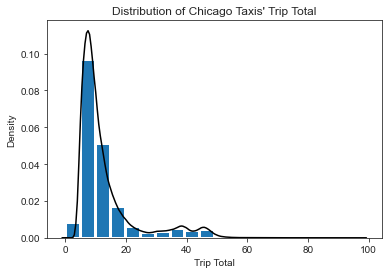

In [5]:
#Live version -> Run only if you have enough memory
_ = sns.distplot(chicago_df['Trip Total'],bins=20,hist=True,kde=True,
             kde_kws={"color": "k", "label": "KDE","alpha": 0.1},
            hist_kws={"linewidth": 3,"alpha": 1})
plt.title("Distribution of Chicago Taxis' Trip Total")
plt.ticklabel_format(style='plain')
_.figure.savefig('img/Trip_Total_Hist.png',bbox_inches='tight')
plt.show()

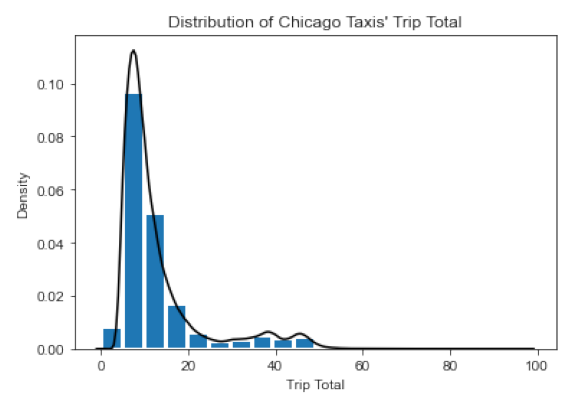

In [6]:
#Offline Version
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
Trip_Total_Hist = pilim.open('img/Trip_Total_Hist.png', 'r')
ax.imshow(np.asarray(Trip_Total_Hist))
ax.set_axis_off()
plt.show()

In [7]:
chicago_df[["Trip Total", "Fare", "Tips", "Tolls", "Extras"]].sum()

Trip Total    2.873419e+08
Fare          2.474669e+08
Tips          2.590695e+07
Tolls         1.245243e+04
Extras        1.395470e+07
dtype: float64

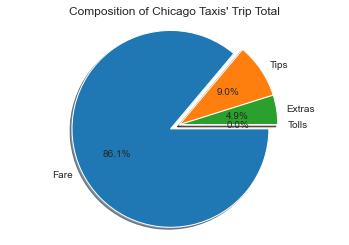

In [8]:
fig1, ax1 = plt.subplots()
data=chicago_df[["Fare", "Tips", "Extras", "Tolls"]]
ax1.pie(data.sum(), autopct='%1.3f%%', labels=data.columns, counterclock=False, explode = [0.1,0,0,0], shadow=True)
ax1.axis('equal')  
plt.title("Composition of Chicago Taxis' Trip Total")
plt.savefig('img/Trip_Total_Pie.png',bbox_inches='tight')

plt.show()

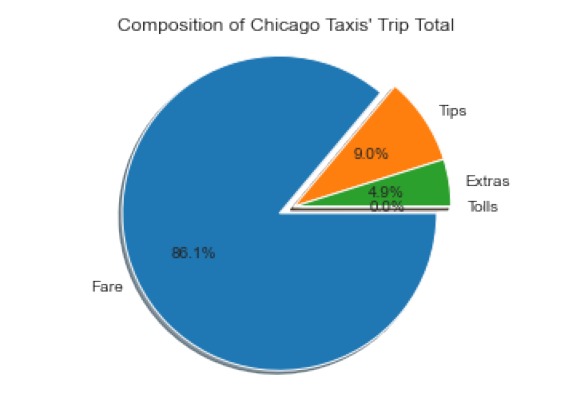

In [9]:
#Offline Version
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
Trip_Total_Pie = pilim.open('img/Trip_Total_Pie.png', 'r')
ax.imshow(np.asarray(Trip_Total_Pie))
ax.set_axis_off()
plt.show()

## Bivariate Analysis
---

### The relationship between total amount and weekday (Temporal Resolution: 24H)
---

In [10]:
#Adds weakday, please find the corresponding function in feature_engineering.py
chicago_df = feature_engineering.add_weekday(chicago_df)

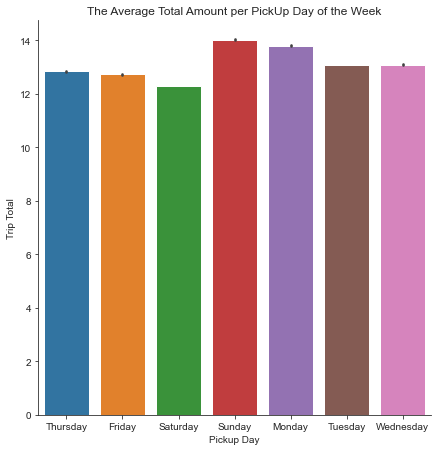

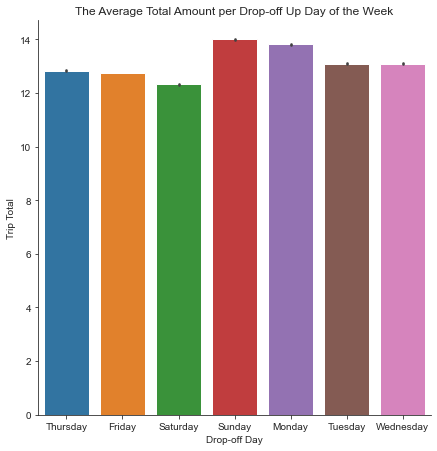

In [11]:
#Live version -> Run only if you have enough memory
#Pickups
_ = sns.catplot(x='Pickup Day',y='Trip Total',kind="bar",data=chicago_df,height=6,aspect=1)
plt.title('The Average Total Amount per PickUp Day of the Week')
_.fig.savefig('img/Total_amount_pickup_dow.png',bbox_inches='tight')

#Dropoffs
_ = sns.catplot(x="Drop-off Day",y='Trip Total',kind="bar",data=chicago_df,height=6,aspect=1)
plt.title('The Average Total Amount per Drop-off Up Day of the Week')
_.fig.savefig('img/Total_amount_dropoff_dow.png',bbox_inches='tight')
plt.show()

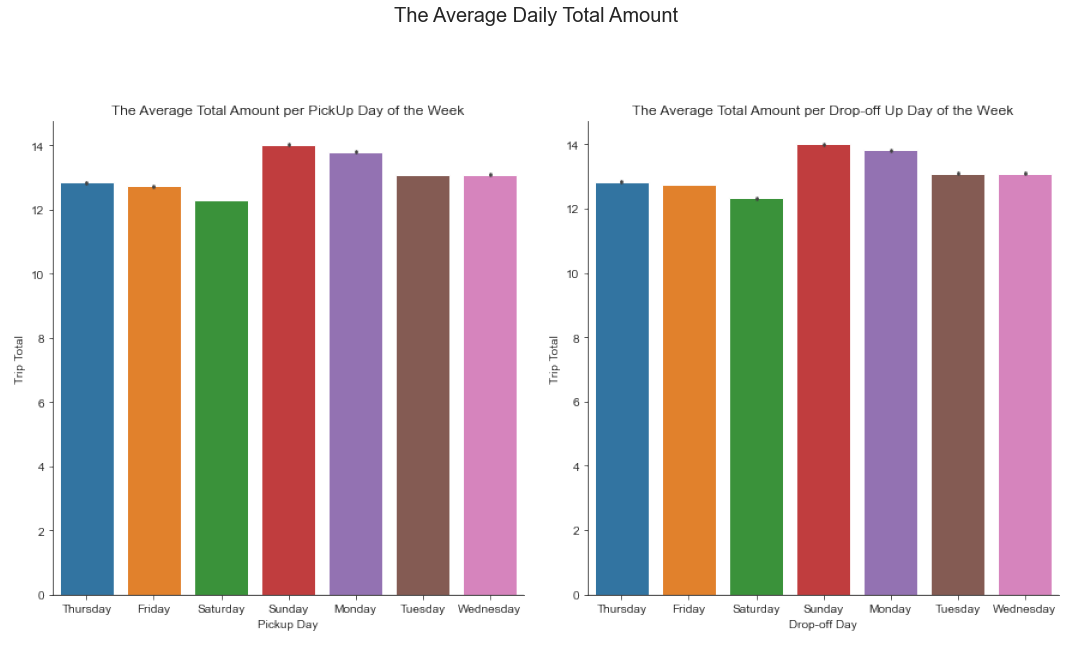

In [12]:
#Offline Version
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

total_amount_dropoff_dow = pilim.open('img/Total_amount_dropoff_dow.png', 'r')
total_amount_pickup_dow = pilim.open('img/Total_amount_pickup_dow.png', 'r')
axes[0].imshow(np.asarray(total_amount_pickup_dow))
axes[1].imshow(np.asarray(total_amount_dropoff_dow))
axes[0].set_axis_off();
axes[1].set_axis_off();
fig.suptitle('The Average Daily Total Amount', fontsize=20)
fig.tight_layout()
plt.show()

### Total amount in the morning, midday, evening, and night (Temporal Resolution: 6H)
---

In [13]:
#Adds 6h time intervals, please find the corresponding function in feature_engineering.py
feature_engineering.add_time_interval(chicago_df)

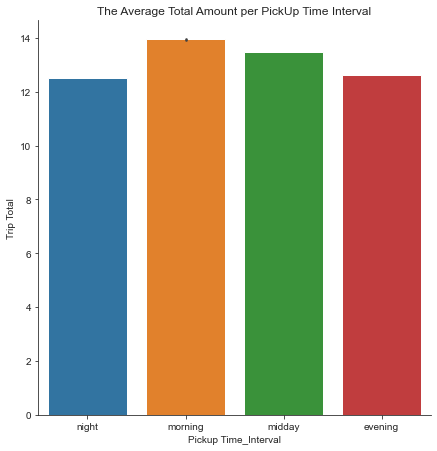

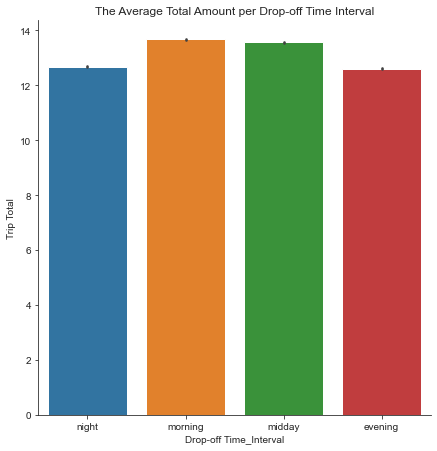

In [14]:
#Live version -> Run only if you have enough memory
#Pickups
_ = sns.catplot(x='Pickup Time_Interval',y='Trip Total',kind="bar",data=chicago_df,height=6,aspect=1)
plt.title('The Average Total Amount per PickUp Time Interval')
_.fig.savefig('img/Total_amount_pickup_time_zone.png',bbox_inches='tight')

#Dropoffs
_ = sns.catplot(x='Drop-off Time_Interval',y='Trip Total',kind="bar",data=chicago_df,height=6,aspect=1)
plt.title('The Average Total Amount per Drop-off Time Interval')
_.fig.savefig('img/Total_amount_dropoff_time_zone.png',bbox_inches='tight')
plt.show()

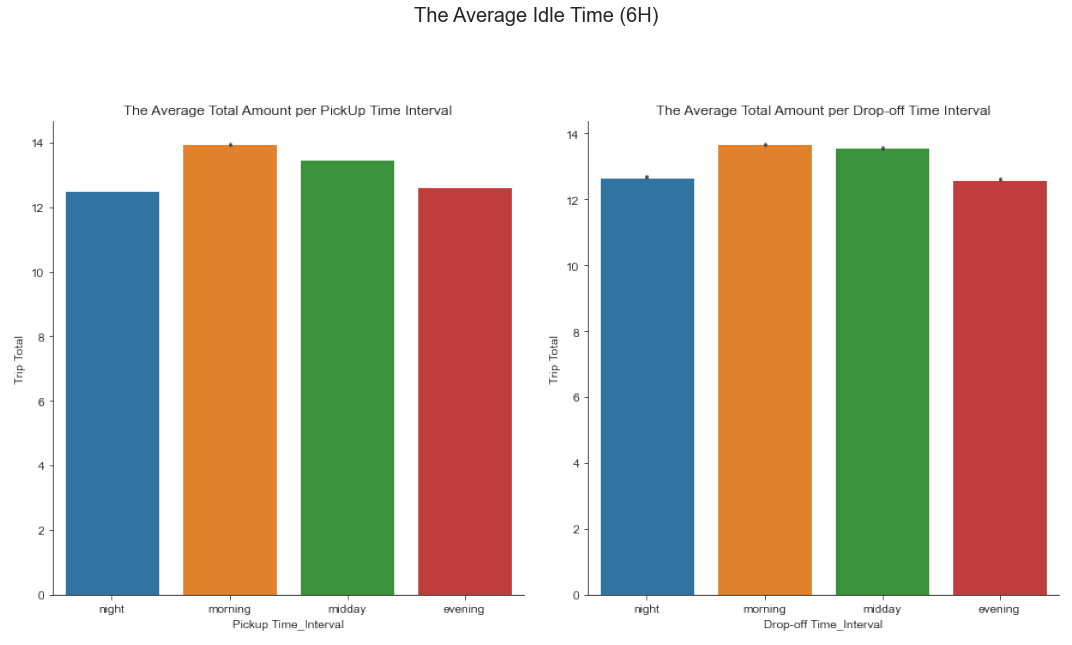

In [15]:
#Offline Version
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

total_amount_dropoff_time_zone = pilim.open('img/Total_amount_dropoff_time_zone.png', 'r')
total_amount_pickup_time_zone = pilim.open('img/Total_amount_pickup_time_zone.png', 'r')
axes[0].imshow(np.asarray(total_amount_pickup_time_zone))
axes[1].imshow(np.asarray(total_amount_dropoff_time_zone))
axes[0].set_axis_off();
axes[1].set_axis_off();
fig.suptitle('The Average Idle Time (6H)', fontsize=20)
fig.tight_layout()
plt.show()

### The relationship between total amount and hour (Temporal Resolution: 1H)
---

In [ ]:
#Live version -> Run only if you have enough memory
#Pickups
_ = sns.catplot(x="Trip Start Hour", y='Trip Total',kind="bar",data=chicago_df)
plt.title('The Average Idle Time per PickUp Day of the Week')
_.fig.savefig('img/Total_amount_pickup_hourly.png',bbox_inches='tight')

#Dropoffs
_ = sns.catplot(x="Trip End Hour", y='Trip Total',kind="bar",data=chicago_df)
plt.title('The Average Total Amount per Drop-off Day of the Week')
_.fig.savefig('img/Total_amount_dropoff_hourly.png',bbox_inches='tight')
plt.show()

In [ ]:
#Offline Version
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

total_amount_pickup_hourly = pilim.open('img/Total_amount_pickup_hourly.png', 'r')
total_amount_dropoff_hourly = pilim.open('img/Total_amount_dropoff_hourly.png', 'r')
axes[0].imshow(np.asarray(total_amount_pickup_hourly))
axes[1].imshow(np.asarray(total_amount_dropoff_hourly))
axes[0].set_axis_off();
axes[1].set_axis_off();
fig.suptitle('The Average Hourly Total Amount', fontsize=20)
fig.tight_layout()
plt.show()

In [ ]:
#Live version -> Run only if you have enough memory
#Pickups
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
pickup_group = chicago_df.groupby("Trip Start Hour")['Trip Total'].mean()
sns.pointplot(x = pickup_group.index, y = pickup_group.values, ax=axes[0])
axes[0].set_title('Avg. Total Amount per PickUp Hour')
axes[0].set_ylabel('Average Total Amount')
axes[0].axhline(1.5, color='red',linestyle='--',linewidth=1)

#Dropoffs
dropoff_group = chicago_df.groupby("Trip End Hour")['Trip Total'].mean()
sns.pointplot(x = dropoff_group.index, y = dropoff_group.values, ax=axes[1])
axes[1].set_title('Avg. Total Amount per Drop-off Hour')
axes[1].set_ylabel('Average Total Amount')
axes[1].axhline(1.5, color='red',linestyle='--',linewidth=1)
figure.savefig('img/Total_amount_point_plots_hourly.png')
plt.show()

In [ ]:
#Offline Version
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
total_amount_points_plots_hourly = pilim.open('img/Total_amount_point_plots_hourly.png', 'r')
ax.imshow(np.asarray(total_amount_points_plots_hourly))
ax.set_axis_off()
plt.show()